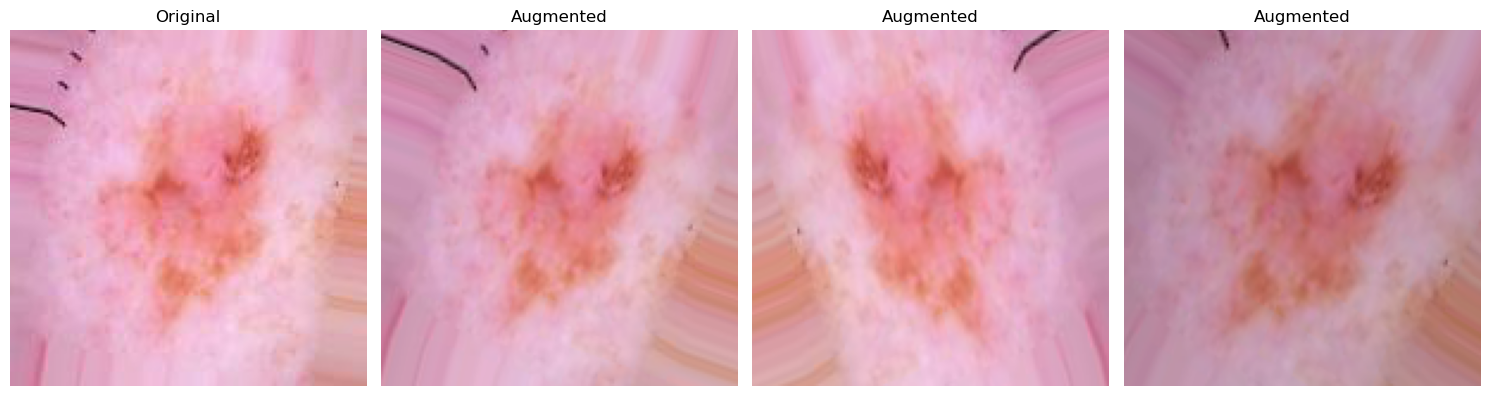

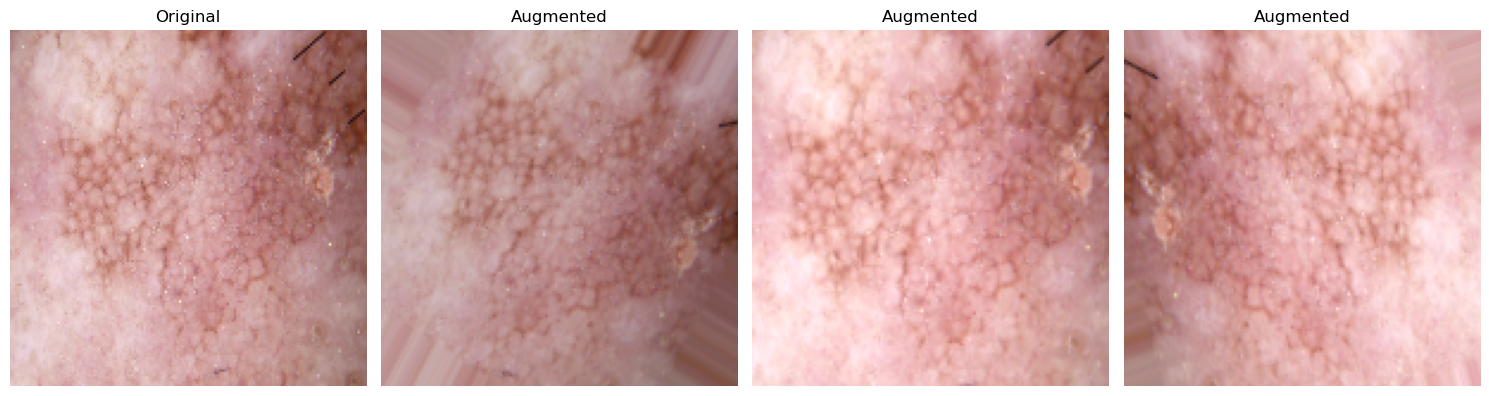

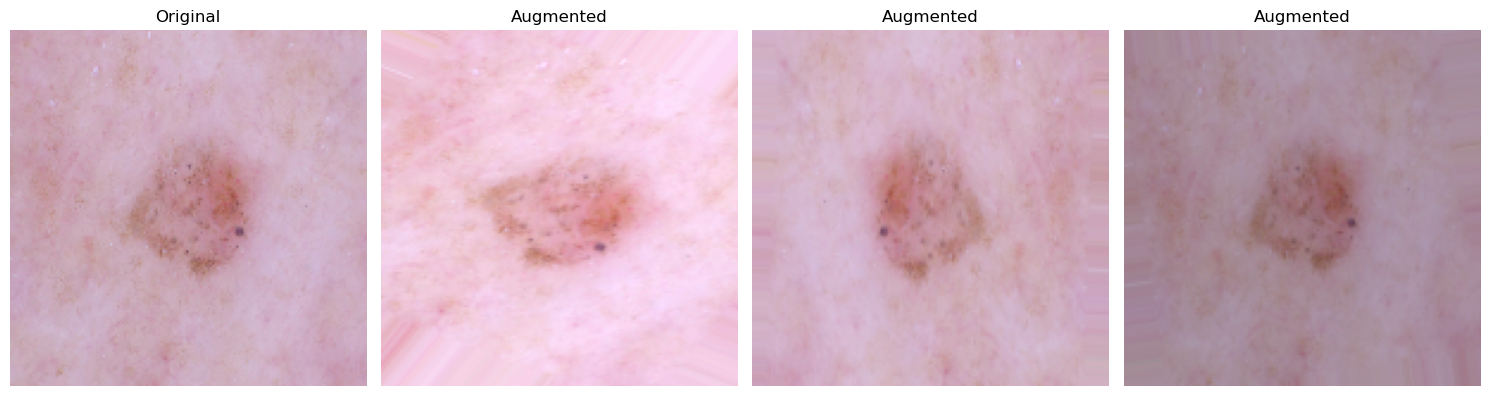

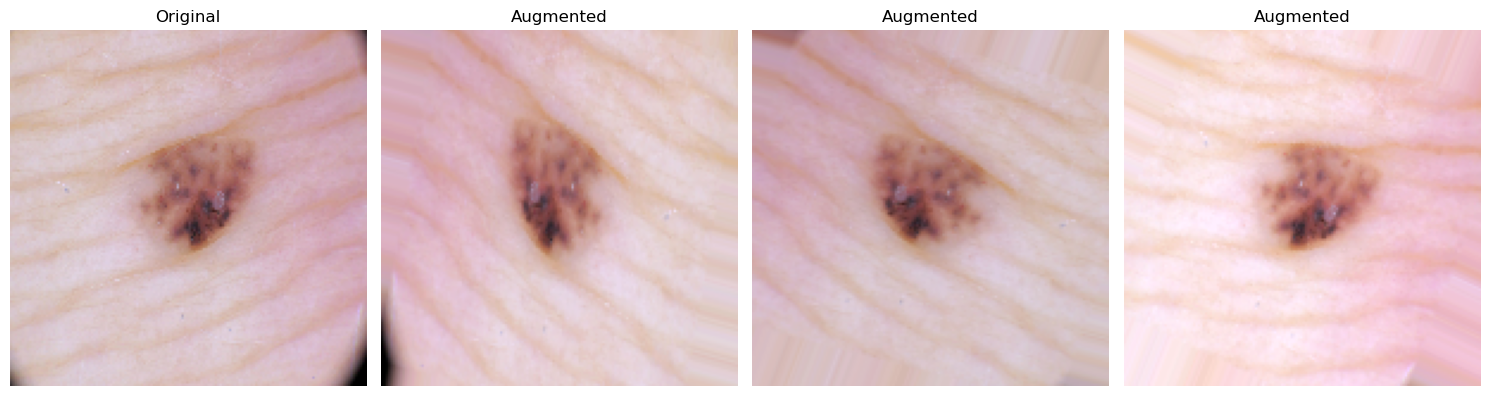

In [1]:
# Simple Data Augmentation with Image Output
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset folder (adjust path as needed)
dataset_folder = 'D:\\SLIIT\\Y2S1\\AI & ML\\Project\\2025-Y2-S1-MLB-B9G2-05\\data\\categorized_images'

# Define augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]
)

# Function to augment and display images for each class
def augment_and_visualize(dataset_folder, num_samples=2, augmentations_per_image=3):
    classes = [d for d in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, d))]
    for cls in classes:
        class_path = os.path.join(dataset_folder, cls)
        images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png'))]
        current_count = len(images)
        max_count = max([len([f for f in os.listdir(os.path.join(dataset_folder, c)) if f.endswith(('.jpg', '.png'))]) for c in classes])
        
        if current_count < max_count:
            sample_images = random.sample(images, min(num_samples, len(images)))  # Select a few images to visualize
            for img_name in sample_images:
                img_path = os.path.join(class_path, img_name)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
                x = tf.keras.preprocessing.image.img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Generate augmented images
                aug_iter = datagen.flow(x, batch_size=1)
                
                # Plot original and augmented images
                plt.figure(figsize=(15, 5))
                plt.subplot(1, augmentations_per_image + 1, 1)
                plt.imshow(img)
                plt.title("Original")
                plt.axis("off")

                for i in range(augmentations_per_image):
                    aug_img = next(aug_iter)[0].astype("uint8")
                    plt.subplot(1, augmentations_per_image + 1, i + 2)
                    plt.imshow(aug_img)
                    plt.title("Augmented")
                    plt.axis("off")

                plt.tight_layout()
                plt.show()

augment_and_visualize(dataset_folder, num_samples=2, augmentations_per_image=3)
